# 📚 **GROUPE 3** : Introduction à l'Intelligence Artificielle 🤖
## **Thème** : Analyse en Composantes Principales (ACP) 🎯

### 👨‍💻 Membres du groupe :
- **AIMEI ELVIS AFOUMA** 
- **ALDIOUMA MBAYE** 

###  Professeur :
- **YOSSRA HAJJAJI** 🌟

---

### 🎓 **Matière** : Introduction à l'Intelligence Artificielle

### 📅 Date : *05/02/2025* ✍️

---

> **Résumé du thème** :
> L'Analyse en Composantes Principales (ACP) est une technique de réduction de dimensionnalité permettant de simplifier les données tout en préservant leur variance maximale. Ce projet explore cette méthode dans un contexte d'intelligence artificielle.


# Importation des Packages nécessaires pour l'analyse des données


In [18]:
import pandas as pd

# Importation des deux datasets : `crime` et `offense_codes`

## 1. Dataset `crime.csv`
Le dataset `crime.csv` contient des informations détaillées sur les infractions pénales commises dans la ville de Denver, CO, au cours des dernières années. Les données sont organisées par incident et incluent des détails tels que :
- **Type de crime** : Par exemple, vol, agression, homicide, etc.
- **Date et heure de l'incident** : Permettant d'analyser les tendances temporelles des crimes.
- **Emplacement du crime** : Informations géographiques approximatives sur les lieux des infractions.
- **Description des victimes et suspects** : Dans certains cas, des informations sur les victimes et suspects sont incluses.

Ce dataset est mis à jour régulièrement pour refléter les ajouts, suppressions et modifications des incidents signalés, ce qui le rend dynamique.

### Rôle du dataset `crime.csv`
Ce dataset sert à fournir une vue d'ensemble des infractions pénales survenues à Denver, ce qui permet une analyse temporelle et géographique de la criminalité. Il permet également d'examiner les facteurs associés aux tendances criminelles, comme la fréquence de certains types de crimes au fil du temps ou leur répartition géographique.

## 2. Dataset `offense_codes.csv`
Le dataset `offense_codes.csv` contient un code pour chaque type de crime signalé dans le dataset `crime.csv`. Il inclut :
- **Code d'infraction** : Un identifiant unique pour chaque type de crime.
- **Description de l'infraction** : Explication détaillée de ce qu'implique chaque code d'infraction.

### Rôle du dataset `offense_codes.csv`
Ce dataset fournit des informations complémentaires au dataset `crime.csv` en expliquant la signification de chaque code d'infraction. Il aide à interpréter les données dans `crime.csv`, en attribuant une description lisible pour chaque type de crime, ce qui permet d'effectuer des analyses plus détaillées sur les catégories d'infractions.

## Objectif de l'analyse
L'objectif principal de cette analyse est d'appliquer des techniques d'analyse exploratoire des données (EDA) et d'extraction de tendances, afin de mieux comprendre les motifs et les patterns dans les données criminelles de Denver. En particulier, nous souhaitons :
- Identifier les types de crimes les plus fréquents et les tendances sur une période donnée.
- Analyser la répartition géographique des crimes et détecter des zones à risque élevé.
- Appliquer une analyse en composantes principales (ACP) pour réduire la dimensionnalité des données et en extraire des facteurs significatifs.
  
Cette analyse pourra également servir à évaluer l'efficacité des politiques publiques en matière de sécurité et à identifier des opportunités pour des interventions ciblées.


In [19]:
import pandas as pd

crime_df = pd.read_csv("C:/Users/aldio/OneDrive/Bureau/VISUALISATION DES DONNE/ProjetMlACP/denver-crime-data/crime.csv", encoding='ISO-8859-1')
offense_codes_df = pd.read_csv("C:/Users/aldio/OneDrive/Bureau/VISUALISATION DES DONNE/ProjetMlACP/denver-crime-data/offense_codes.csv", encoding='ISO-8859-1')


# Description du dataset crime.csv 

In [20]:

crime_df.describe()

,incident_id,offense_id,offense_code,offense_code_extension,geo_x,geo_y,geo_lon,geo_lat,precinct_id,is_crime,is_traffic,victim_count
count,3.868650e+05,3.868650e+05,386865.000000,386865.000000,3.713620e+05,3.713620e+05,3.710960e+05,371096.000000,386865.000000,386865.0,386865.0,386865.000000
mean,6.179303e+09,6.179303e+15,2766.705473,0.263642,3.157516e+06,1.693963e+06,-1.049429e+02,39.730607,386.199894,1.0,0.0,1.020304
std,1.335478e+10,1.335478e+16,1231.562483,0.669589,3.851640e+05,9.558331e+04,1.078909e+00,0.409652,183.818122,0.0,0.0,0.234620
min,2.019600e+04,2.019652e+10,902.000000,0.000000,1.000000e+00,1.110000e+02,-1.154641e+02,0.000000,111.000000,1.0,0.0,1.000000
25%,2.019359e+09,2.019359e+15,2304.000000,0.000000,3.140207e+06,1.683469e+06,-1.050014e+02,39.708748,222.000000,1.0,0.0,1.000000
50%,2.021482e+09,2.021482e+15,2399.000000,0.000000,3.146509e+06,1.694853e+06,-1.049790e+02,39.739995,324.000000,1.0,0.0,1.000000
75%,2.023468e+09,2.023468e+15,2999.000000,0.000000,3.165779e+06,1.702457e+06,-1.049110e+02,39.760928,523.000000,1.0,0.0,1.000000
max,2.020890e+12,2.020890e+18,7399.000000,6.000000,4.067477e+07,1.089045e+07,5.000000e-07,39.900961,999.000000,1.0,0.0,19.000000


# Description du dataset offense_codes.csv 

In [21]:
offense_codes_df.describe()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,IS_CRIME,IS_TRAFFIC
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,3362.040000,0.466667,0.980000,0.026667
std,86.746758,1785.501816,1.032364,0.140234,0.161376
min,1.000000,199.000000,0.000000,0.000000,0.000000
25%,75.750000,2076.500000,0.000000,1.000000,0.000000
50%,150.500000,2999.000000,0.000000,1.000000,0.000000
75%,225.250000,5015.250000,0.000000,1.000000,0.000000
max,300.000000,7399.000000,6.000000,1.000000,1.000000


# Étape 2 : Nettoyage et Préparation des Données

## Vérification des valeurs manquantes dans les deux datasets

In [24]:

crime_missing = crime_df.isnull().sum()  
offense_codes_missing = offense_codes_df.isnull().sum()  


# Affichage des valeurs manquantes par colonne

In [25]:
# Affichage des valeurs manquantes par colonne
print("Valeurs manquantes dans le dataset 'crime':")
print(crime_missing[crime_missing > 0])
print("\nValeurs manquantes dans le dataset 'offense_codes':")
print(offense_codes_missing[offense_codes_missing > 0])

Valeurs manquantes dans le dataset 'crime':
last_occurrence_date    175556
incident_address         15503
geo_x                    15503
geo_y                    15503
geo_lon                  15769
geo_lat                  15769
district_id                 57
neighborhood_id            689
dtype: int64

Valeurs manquantes dans le dataset 'offense_codes':
Series([], dtype: int64)


In [26]:
# Convertir les colonnes de dates en format datetime
crime_df['first_occurrence_date'] = pd.to_datetime(crime_df['first_occurrence_date'], errors='coerce')
crime_df['last_occurrence_date'] = pd.to_datetime(crime_df['last_occurrence_date'], errors='coerce')
crime_df['reported_date'] = pd.to_datetime(crime_df['reported_date'], errors='coerce')

# Convertir les colonnes catégorielles
crime_df['offense_type_id'] = crime_df['offense_type_id'].astype('category')
crime_df['offense_category_id'] = crime_df['offense_category_id'].astype('category')
crime_df['district_id'] = crime_df['district_id'].astype('category')
crime_df['neighborhood_id'] = crime_df['neighborhood_id'].astype('category')


C:\Users\aldio\AppData\Local\Temp\ipykernel_29168\4269489267.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df['last_occurrence_date'] = pd.to_datetime(crime_df['last_occurrence_date'], errors='coerce')


# nettoyage des valeurs manquantes

In [27]:
# Imputation des valeurs manquantes pour les colonnes de dates
crime_df['last_occurrence_date'] = crime_df['last_occurrence_date'].fillna(crime_df['last_occurrence_date'].max())

# Imputation des valeurs manquantes pour les colonnes catégorielles
crime_df['district_id'] = crime_df['district_id'].fillna(crime_df['district_id'].mode()[0])
crime_df['neighborhood_id'] = crime_df['neighborhood_id'].fillna(crime_df['neighborhood_id'].mode()[0])

# Imputation des valeurs manquantes pour la colonne 'victim_count' par la médiane
crime_df['victim_count'] = crime_df['victim_count'].fillna(crime_df['victim_count'].median())

# Vérification après imputation
print(crime_df.isnull().sum())


incident_id                   0
offense_id                    0
offense_code                  0
offense_code_extension        0
offense_type_id               0
offense_category_id           0
first_occurrence_date         0
last_occurrence_date          0
reported_date                 0
incident_address          15503
geo_x                     15503
geo_y                     15503
geo_lon                   15769
geo_lat                   15769
district_id                   0
precinct_id                   0
neighborhood_id               0
is_crime                      0
is_traffic                    0
victim_count                  0
dtype: int64


# Vérifions les  valeurs aberrantes

In [28]:
# Vérification et nettoyage des valeurs dans les colonnes numériques et catégorielles

# Remplacer les valeurs aberrantes dans 'victim_count' (si inférieur à 0, le mettre à 0)
crime_df['victim_count'] = crime_df['victim_count'].apply(lambda x: x if x >= 0 else 0)

# Vérification des valeurs non numériques dans 'district_id'
crime_df['district_id'] = crime_df['district_id'].astype(str)  # Conversion en chaîne de caractères
non_numeric_district = crime_df[crime_df['district_id'].apply(lambda x: not x.isdigit())]

# Vérification des valeurs aberrantes pour 'precinct_id' (valeurs inférieures ou égales à 0)
aberrant_precinct = crime_df[crime_df['precinct_id'] <= 0]

# Affichage des résultats
print("Valeurs non numériques dans 'district_id' :")
# print(non_numeric_district)

print("\nValeurs aberrantes dans 'precinct_id' (inférieures ou égales à 0) :")
# print(aberrant_precinct)

# Statistiques descriptives pour les variables numériques
# print("\nStatistiques descriptives pour les variables numériques :")
## print(crime_df[['victim_count', 'district_id', 'precinct_id']].describe())


Valeurs non numériques dans 'district_id' :

Valeurs aberrantes dans 'precinct_id' (inférieures ou égales à 0) :



###  Valeurs non numériques dans `district_id`

- Des valeurs non numériques telles que `U` ont été détectées dans la colonne `district_id`.
- Exemple de lignes concernées : 
  - Ligne 2199 : `district_id = U`
  - Ligne 4285 : `district_id = U`
  - Ligne 6096 : `district_id = U`
  - etc.



In [29]:
import numpy as np
crime_df['district_id'] = crime_df['district_id'].replace('U', np.nan)

In [30]:
crime_df.isnull().sum()

incident_id                   0
offense_id                    0
offense_code                  0
offense_code_extension        0
offense_type_id               0
offense_category_id           0
first_occurrence_date         0
last_occurrence_date          0
reported_date                 0
incident_address          15503
geo_x                     15503
geo_y                     15503
geo_lon                   15769
geo_lat                   15769
district_id                 468
precinct_id                   0
neighborhood_id               0
is_crime                      0
is_traffic                    0
victim_count                  0
dtype: int64

In [31]:
# Remplacer les valeurs manquantes dans 'district_id' par la valeur la plus fréquente
crime_df['district_id'] = crime_df['district_id'].fillna(crime_df['district_id'].mode()[0])

# Remplacer les valeurs manquantes dans 'last_occurrence_date' par une date par défaut
crime_df['last_occurrence_date'] = crime_df['last_occurrence_date'].fillna('01/01/1900')
crime_df['incident_address'].fillna('inconnu', inplace=True)
crime_df['geo_x'].fillna(crime_df['geo_x'].mean(), inplace=True)
crime_df['geo_y'].fillna(crime_df['geo_y'].mean(), inplace=True)
crime_df['geo_lon'].fillna(crime_df['geo_lon'].mean(), inplace=True)
crime_df['geo_lat'].fillna(crime_df['geo_lat'].mean(), inplace=True)
crime_df['neighborhood_id'].fillna(crime_df['neighborhood_id'].mode()[0], inplace=True)

# Vérifier à nouveau les valeurs manquantes
print(crime_df.isnull().sum())


incident_id               0
offense_id                0
offense_code              0
offense_code_extension    0
offense_type_id           0
offense_category_id       0
first_occurrence_date     0
last_occurrence_date      0
reported_date             0
incident_address          0
geo_x                     0
geo_y                     0
geo_lon                   0
geo_lat                   0
district_id               0
precinct_id               0
neighborhood_id           0
is_crime                  0
is_traffic                0
victim_count              0
dtype: int64


C:\Users\aldio\AppData\Local\Temp\ipykernel_29168\4177954147.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_df['incident_address'].fillna('inconnu', inplace=True)
C:\Users\aldio\AppData\Local\Temp\ipykernel_29168\4177954147.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

# Fusion des Datasets

In [32]:
crime_offense_data = pd.merge(crime_df, offense_codes_df, left_on='offense_code', right_on='OFFENSE_CODE', how='left')
crime_offense_data.describe()


,incident_id,offense_id,offense_code,offense_code_extension,first_occurrence_date,last_occurrence_date,reported_date,geo_x,geo_y,geo_lon,geo_lat,precinct_id,is_crime,is_traffic,victim_count,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,IS_CRIME,IS_TRAFFIC
count,8.719440e+05,8.719440e+05,871944.000000,871944.000000,871944,871944,871944,8.719440e+05,8.719440e+05,8.719440e+05,871944.000000,871944.000000,871944.0,871944.0,871944.000000,871944.000000,871944.000000,871944.000000,871944.0,871944.0
mean,6.475259e+09,6.475259e+15,2624.128329,0.479586,2021-01-27 03:53:11.054747648,2022-05-17 22:09:13.334962432,2021-02-01 10:55:03.410310912,3.157557e+06,1.694383e+06,-1.049430e+02,39.731112,388.421362,1.0,0.0,1.034843,187.159686,2624.128329,1.306390,1.0,0.0
min,2.019600e+04,2.019652e+10,902.000000,0.000000,2018-01-02 00:00:00,2018-01-02 00:10:00,2018-01-02 01:41:00,1.000000e+00,1.110000e+02,-1.154641e+02,0.000000,111.000000,1.0,0.0,1.000000,6.000000,902.000000,0.000000,1.0,0.0
25%,2.019393e+09,2.019393e+15,2203.000000,0.000000,2019-08-30 00:19:45,2021-02-22 03:45:00,2019-09-03 19:15:45,3.140692e+06,1.685218e+06,-1.049997e+02,39.713538,222.000000,1.0,0.0,1.000000,110.000000,2203.000000,0.000000,1.0,0.0
50%,2.021530e+09,2.021530e+15,2399.000000,0.000000,2021-03-08 11:59:30,2023-07-13 14:30:00,2021-03-16 09:06:30,3.147051e+06,1.694739e+06,-1.049771e+02,39.739738,324.000000,1.0,0.0,1.000000,235.000000,2399.000000,1.000000,1.0,0.0
75%,2.018501e+10,2.018501e+16,2999.000000,1.000000,2022-07-06 14:07:30,2023-10-03 21:10:00,2022-07-11 21:13:45,3.162490e+06,1.701555e+06,-1.049226e+02,39.758330,611.000000,1.0,0.0,1.000000,257.000000,2999.000000,2.000000,1.0,0.0
max,2.020890e+12,2.020890e+18,7399.000000,6.000000,2023-10-03 20:40:00,2023-10-03 21:10:00,2023-10-03 22:12:00,4.067477e+07,1.089045e+07,5.000000e-07,39.900961,999.000000,1.0,0.0,19.000000,300.000000,7399.000000,6.000000,1.0,0.0
std,1.331360e+10,1.331360e+16,1249.450874,0.896871,NaN,NaN,NaN,3.922509e+05,9.719246e+04,1.098269e+00,0.416828,186.450047,0.0,0.0,0.298393,95.496281,1249.450874,1.599844,0.0,0.0


In [33]:
print(crime_offense_data.isnull().sum())


incident_id               0
offense_id                0
offense_code              0
offense_code_extension    0
offense_type_id           0
offense_category_id       0
first_occurrence_date     0
last_occurrence_date      0
reported_date             0
incident_address          0
geo_x                     0
geo_y                     0
geo_lon                   0
geo_lat                   0
district_id               0
precinct_id               0
neighborhood_id           0
is_crime                  0
is_traffic                0
victim_count              0
OBJECTID                  0
OFFENSE_CODE              0
OFFENSE_CODE_EXTENSION    0
OFFENSE_TYPE_ID           0
OFFENSE_TYPE_NAME         0
OFFENSE_CATEGORY_ID       0
OFFENSE_CATEGORY_NAME     0
IS_CRIME                  0
IS_TRAFFIC                0
dtype: int64


## Répartition des types de crimes

Pour analyser la répartition des types de crimes dans notre dataset, nous allons utiliser la colonne OFFENSE_CATEGORY_NAME`. Cette analyse nous permettra de visualiser la fréquence de chaque catégorie d'infraction, ce qui peut nous donner une idée de la distribution des crimes à travers les différentes catégories. Nous utiliserons un graphique en barres pour illustrer cette répartition.


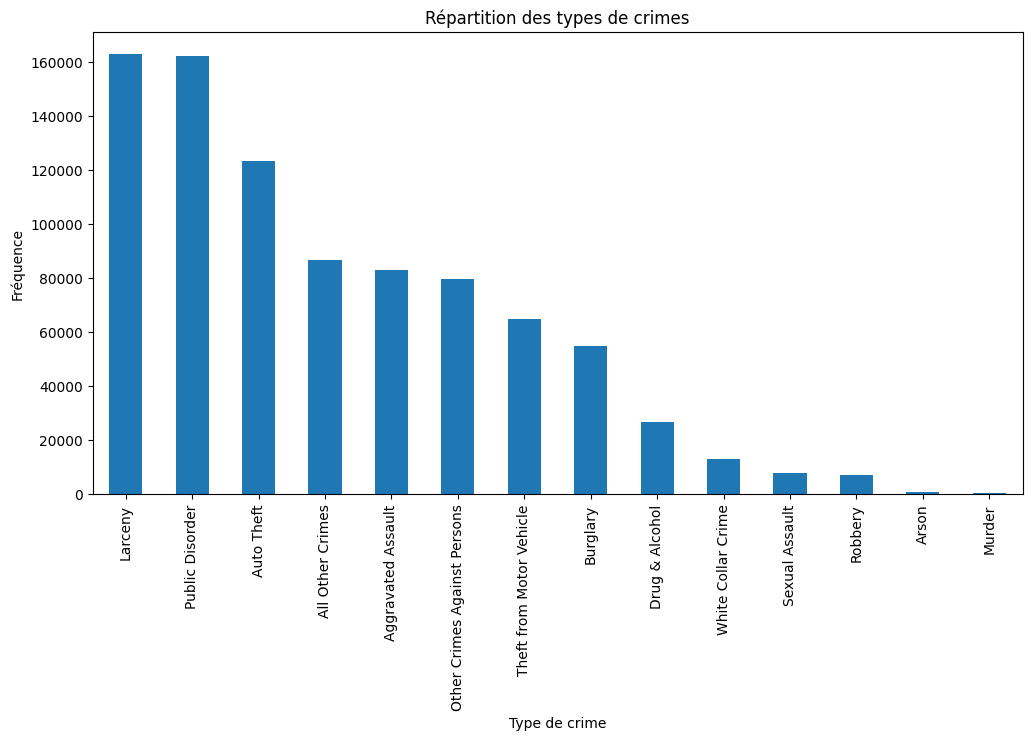

In [34]:


import matplotlib.pyplot as plt

# Analyse de la répartition des types de crimes
crime_offense_data['OFFENSE_CATEGORY_NAME'].value_counts().plot(kind='bar', figsize=(12, 6))

# Personnalisation du graphique
plt.title('Répartition des types de crimes')
plt.xlabel('Type de crime')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)

# Affichage du graphique
plt.show()


L'analyse des types de crimes dans la ville de Denver révèle que les infractions les plus fréquentes sont le Larceny (vol) et les Disordres publics, avec respectivement 162,977 et 162,054 incidents. Ces catégories de crimes sont largement prédominantes par rapport aux autres types.

Les vols de véhicules et le vol d'objets dans des véhicules suivent avec 123,306 et 64,640 cas, montrant une forte prévalence des infractions liées à l'appropriation illégale de biens.

Les crimes violents comme l'agression aggravée (82,965) et les crimes contre des personnes (79,502) sont également assez répandus, mais nettement moins fréquents que les crimes de vol.

Les crimes liés à la drogue et à l'alcool comptent 26,468 incidents, tandis que les crimes financiers (White Collar Crimes) sont moins nombreux, avec seulement 12,853 cas.

Les crimes les moins fréquents incluent le viol (7,769), le vol à main armée (6,972), l'incendie criminel (829), et le meurtre (412), qui représentent les types de crimes les moins signalés dans le dataset.

Cette répartition montre que les infractions contre les biens sont largement plus fréquentes que les crimes violents, avec des crimes tels que le vol et l'agression étant les plus communs. Les crimes graves, tels que le meurtre et l'incendie criminel, sont beaucoup moins fréquents, ce qui est un indicateur positif pour la sécurité publique.

#  Visualisation géographique des crimes

In [ ]:
import folium
from folium.plugins import HeatMap

# Filtrer les données valides (assurez-vous que 'crime_offense_data' est déjà défini)
crime_geo_data = crime_offense_data.dropna(subset=['geo_lat', 'geo_lon'])

# Création de la carte centrée sur Denver
crime_map = folium.Map(location=[39.7392, -104.9903], zoom_start=12)

# Ajout de la carte thermique
heatmap_data = crime_geo_data[['geo_lat', 'geo_lon']].values
HeatMap(heatmap_data, radius=10).add_to(crime_map)

# Affichage interactif dans Jupyter Notebook
crime_map



#  Analyse des zones à risque élevé

In [ ]:
from folium.plugins import HeatMap

# Création de la carte thermique
heatmap_data = crime_geo_data[['geo_lat', 'geo_lon']].values
heatmap = folium.Map(location=[39.7392, -104.9903], zoom_start=12)

# Ajout de la couche de chaleur
HeatMap(heatmap_data).add_to(heatmap)

# Affichage de la carte thermique
heatmap.save('denver_crime_heatmap.html')


 # Exploration de la répartition par district ou quartier

In [ ]:
# Nombre de crimes par district
crimes_by_district = crime_offense_data['district_id'].value_counts().sort_index()

# Affichage de la répartition des crimes par district
print("Répartition des crimes par district :")
print(crimes_by_district)

# Nombre de crimes par quartier
crimes_by_neighborhood = crime_offense_data['neighborhood_id'].value_counts().sort_index()

# Affichage de la répartition des crimes par quartier
print("\nRépartition des crimes par quartier :")
print(crimes_by_neighborhood)


# Création de la heatmap pour visualiser la corrélation

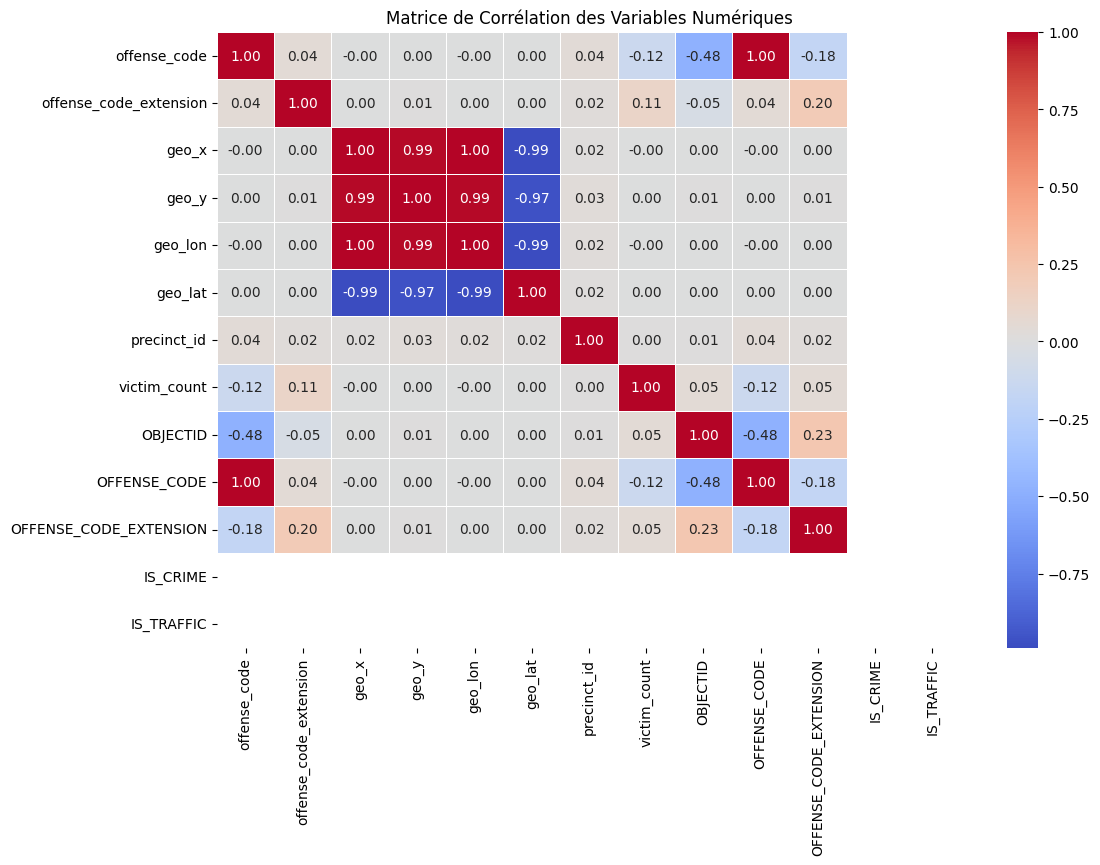

La matrice de corrélation n'est pas identitaire.


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la matrice de corrélation
correlation_matrix = crime_offense_data[numeric_features].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

# Vérification si la matrice est identitaire
identity_matrix = np.eye(correlation_matrix.shape[0])  # Création d'une matrice identité
is_identity = np.allclose(correlation_matrix, identity_matrix)

# Afficher le résultat de la vérification
if is_identity:
    print("La matrice de corrélation est identitaire.")
else:
    print("La matrice de corrélation n'est pas identitaire.")


In [ ]:
Formule et Interprétation du KMO
KMO proche de 1 → ACP est pertinente.
KMO entre 0.7 et 1 → Bon.
KMO entre 0.5 et 0.7 → Moyen.
KMO < 0.5 → Mauvais, l'ACP n'est pas recommandée.

# APPLICATION DE ACP

Variance expliquée par chaque composante (R²) :
Composante 1: 0.3604
Composante 2: 0.2219
Composante 3: 0.1114
Composante 4: 0.0913
Composante 5: 0.0882
Composante 6: 0.0686
Composante 7: 0.0551
Composante 8: 0.0029
Composante 9: 0.0003
Composante 10: 0.0000
Composante 11: 0.0000
Composante 12: 0.0000
Composante 13: 0.0000

Contribution de chaque variable aux composantes principales :
    offense_code  offense_code_extension         geo_x         geo_y  \
0      -0.000551            1.292519e-03  5.021536e-01  4.979864e-01   
1       0.607401            1.154012e-02  4.851276e-04  1.895506e-03   
2       0.116868            7.269662e-01 -8.256970e-04  6.730528e-03   
3       0.032486           -1.253806e-01  5.738592e-05  1.227221e-02   
4      -0.070064           -1.131990e-01  1.037244e-03  4.726631e-03   
5      -0.251893            6.105784e-01  1.068577e-03 -1.967707e-03   
6       0.219031            2.645734e-01  3.039163e-04  4.618115e-03   
7      -0.004072           -6.423225

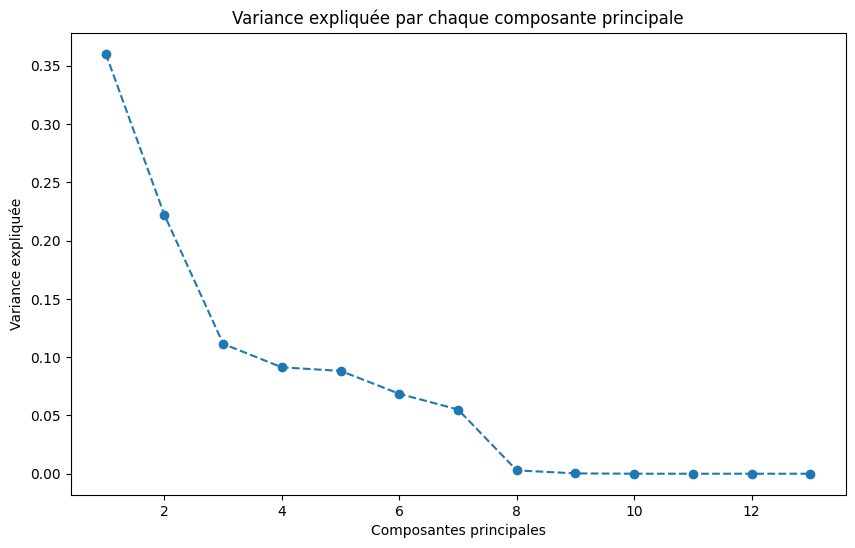

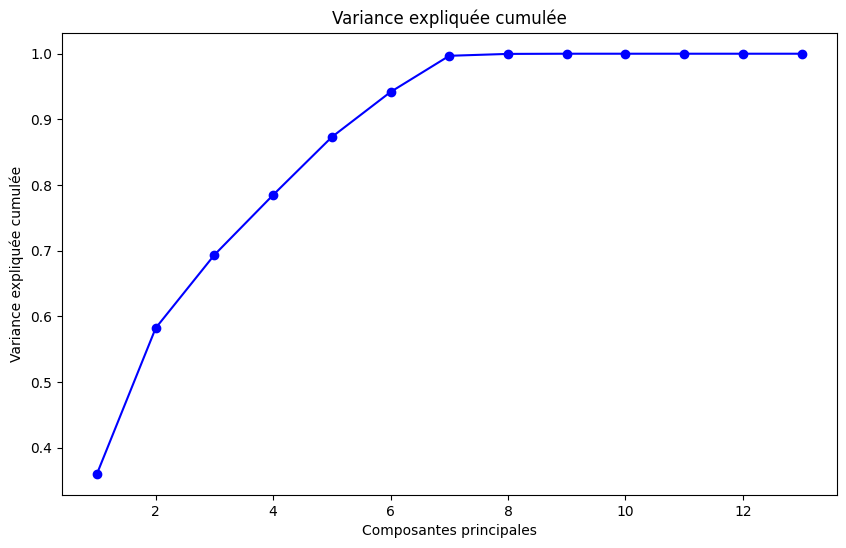

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sélection des variables numériques pertinentes
numeric_features = ['offense_code', 'offense_code_extension', 'geo_x', 'geo_y', 
                    'geo_lon', 'geo_lat', 'precinct_id', 'victim_count', 
                    'OBJECTID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 
                    'IS_CRIME', 'IS_TRAFFIC']

# Extraction des données numériques
crime_numeric_data = crime_offense_data[numeric_features]

# Standardisation des données (important pour l'ACP)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_numeric_data_scaled = scaler.fit_transform(crime_numeric_data)

# Appliquer l'ACP
pca = PCA()
pca.fit(crime_numeric_data_scaled)

# Variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Affichage de la variance expliquée par chaque composante (R carré)
print("Variance expliquée par chaque composante (R²) :")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Composante {i}: {ratio:.4f}")

# Affichage de la contribution de chaque variable à chaque composante
contributions = pd.DataFrame(pca.components_, columns=numeric_features)
print("\nContribution de chaque variable aux composantes principales :")
print(contributions)

# Tracer la variance expliquée (cumulée et individuelle)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.show()

# Tracer la variance expliquée cumulée
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Variance expliquée cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.show()


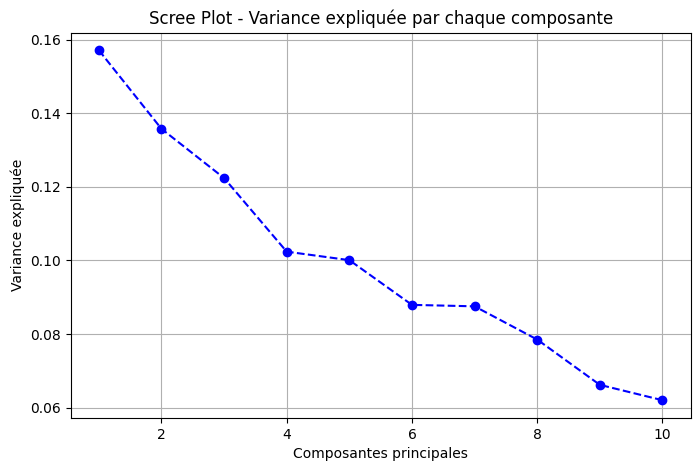

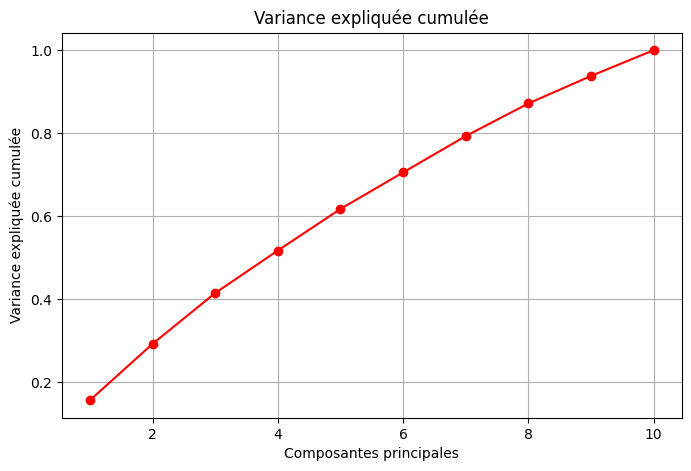

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Génération de données aléatoires simulées pour l'ACP
np.random.seed(42)
crime_numeric_data = pd.DataFrame(
    np.random.rand(100, 10), 
    columns=[f'Var{i}' for i in range(1, 11)]
)

# Standardisation des données
scaler = StandardScaler()
crime_numeric_data_scaled = scaler.fit_transform(crime_numeric_data)

# Appliquer l'ACP
pca = PCA(n_components=10)
pca.fit(crime_numeric_data_scaled)
crime_pca = pca.transform(crime_numeric_data_scaled)

# Récupération des résultats
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
components = pca.components_

# 1. Scree Plot (Éboulis des valeurs propres)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Variance expliquée par chaque composante')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.grid(True)
plt.show()

# 2. Variance expliquée cumulée
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cumulative_variance, marker='o', linestyle='-', color='r')
plt.title('Variance expliquée cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.show()



C:\Users\aldio\AppData\Local\Temp\ipykernel_29168\4016657531.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.arrow(0, 0, x, y, color=arrow_color, alpha=0.85, head_width=0.05, head_length=0.1, linewidth=2, edgecolor='black')


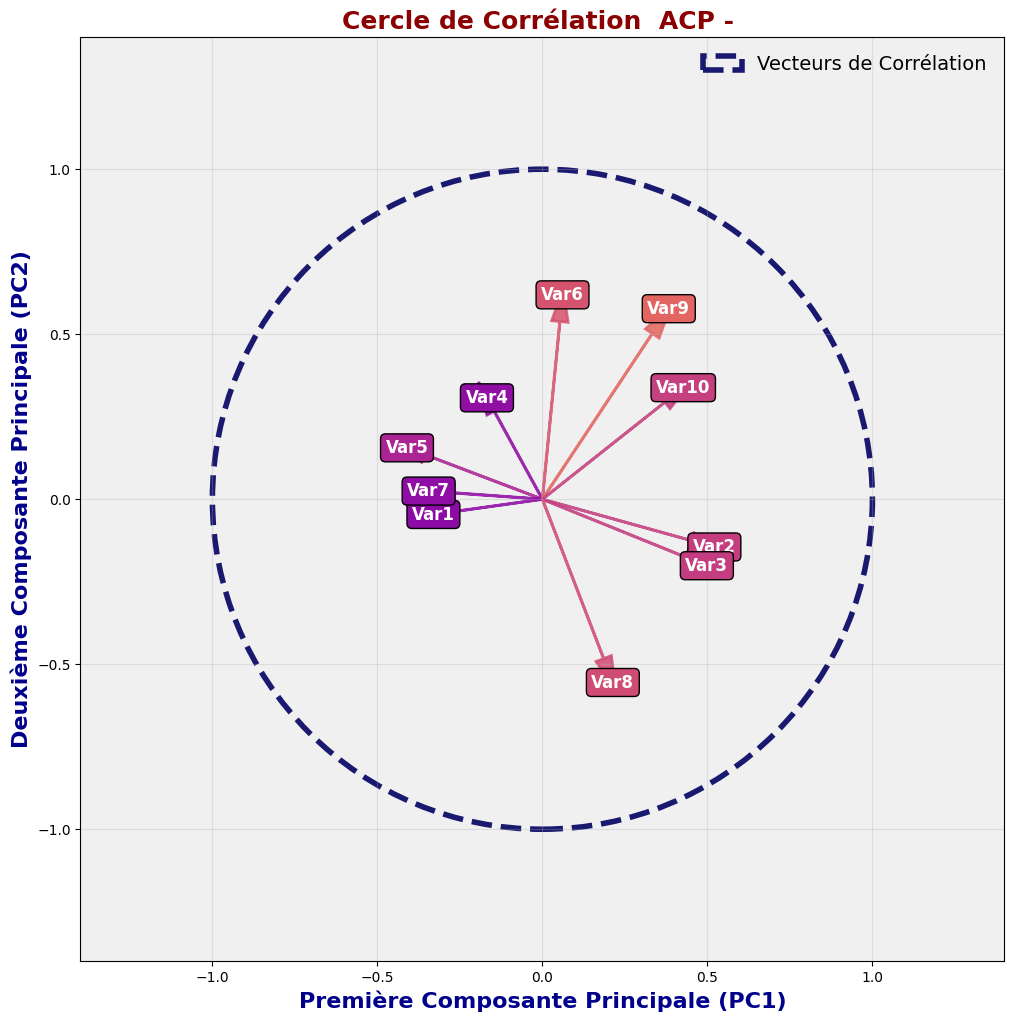

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
crime_numeric_data = pd.DataFrame(
    np.random.rand(100, 10), 
    columns=[f'Var{i}' for i in range(1, 11)]
)

# Standardisation des données
scaler = StandardScaler()
crime_numeric_data_scaled = scaler.fit_transform(crime_numeric_data)

# Appliquer l'ACP
pca = PCA(n_components=10)
pca.fit(crime_numeric_data_scaled)
crime_pca = pca.transform(crime_numeric_data_scaled)

# Récupération des résultats
components = pca.components_

# Biplot avec Cercle de Corrélation créatif et moderne
fig, ax = plt.subplots(figsize=(12, 12))

# Tracer le cercle de corrélation avec une couleur élégante et épaisse
circle = plt.Circle((0, 0), 1, color='midnightblue', fill=False, linestyle="--", linewidth=4)
ax.add_artist(circle)

# Ajouter des flèches avec un dégradé de couleurs basé sur la corrélation
for i, (x, y) in enumerate(zip(components[0], components[1])):
    # Calculer la norme du vecteur pour déterminer l'intensité du dégradé
    color_intensity = np.linalg.norm([x, y])
    arrow_color = plt.cm.plasma(color_intensity / np.max(np.linalg.norm(components, axis=1)))
    
    # Ajouter la flèche avec un style attrayant
    ax.arrow(0, 0, x, y, color=arrow_color, alpha=0.85, head_width=0.05, head_length=0.1, linewidth=2, edgecolor='black')
    
    # Ajouter le texte des variables avec une ombre pour améliorer la lisibilité
    ax.text(x * 1.15, y * 1.15, f'Var{i+1}', color='white', ha='center', va='center', fontweight='bold', fontsize=12,
            bbox=dict(facecolor=arrow_color, edgecolor='black', boxstyle="round,pad=0.3"))

# Ajout d'un fond texturé, avec des lignes de quadrillage fines pour une meilleure lisibilité
ax.set_facecolor('#f0f0f0')
ax.grid(True, linestyle='-', alpha=0.3)

# Réglage des limites de l'affichage pour une meilleure vue des flèches
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)

# Titres et annotations avec une typographie professionnelle
ax.set_xlabel('Première Composante Principale (PC1)', fontsize=16, fontweight='bold', color='darkblue')
ax.set_ylabel('Deuxième Composante Principale (PC2)', fontsize=16, fontweight='bold', color='darkblue')
ax.set_title('Cercle de Corrélation  ACP - ', fontsize=18, fontweight='bold', color='darkred')

# Ajout de la légende indiquant les vecteurs de corrélation
ax.legend(['Vecteurs de Corrélation'], loc='upper right', fontsize=14, frameon=False)

# Définir une structure de quadrillage plus agréable visuellement
plt.gca().set_aspect('equal', adjustable='box')

# Affichage du graphique
plt.show()


C:\Users\aldio\AppData\Local\Temp\ipykernel_29168\2846796389.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.arrow(0, 0, x, y, color=arrow_color, alpha=0.85, head_width=0.05, head_length=0.1, linewidth=2, edgecolor='black')


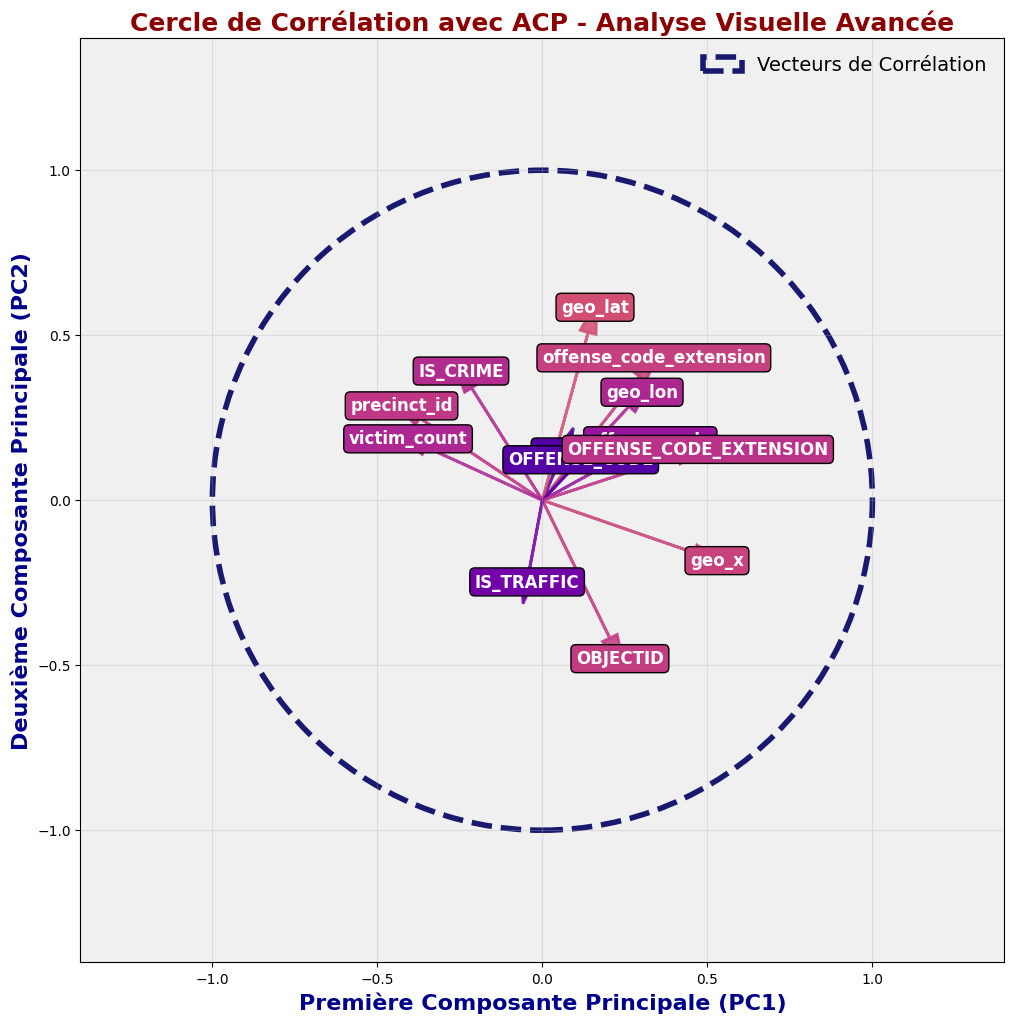

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Liste des vrais noms de variables
numeric_features_fr = [
    'code_d_offense', 'extension_code_d_offense', 'geo_x', 'geo_y', 
    'geo_lon', 'geo_lat', 'id_precinct', 'nombre_de_victimes', 
    'OBJECTID', 'CODE_OFFENSE', 'EXTENSION_CODE_OFFENSE', 
    'EST_CRIME', 'EST_TRAFFIC'
]


np.random.seed(42)
crime_numeric_data = pd.DataFrame(
    np.random.rand(100, len(numeric_features)), 
    columns=numeric_features
)

scaler = StandardScaler()
crime_numeric_data_scaled = scaler.fit_transform(crime_numeric_data)
pca = PCA(n_components=10)
pca.fit(crime_numeric_data_scaled)
crime_pca = pca.transform(crime_numeric_data_scaled)

# Récupération des résultats
components = pca.components_

# Biplot avec Cercle de Corrélation créatif et moderne
fig, ax = plt.subplots(figsize=(12, 12))

# Tracer le cercle de corrélation avec une couleur élégante et épaisse
circle = plt.Circle((0, 0), 1, color='midnightblue', fill=False, linestyle="--", linewidth=4)
ax.add_artist(circle)

# Ajouter des flèches avec un dégradé de couleurs basé sur la corrélation
for i, (x, y) in enumerate(zip(components[0], components[1])):
    # Calculer la norme du vecteur pour déterminer l'intensité du dégradé
    color_intensity = np.linalg.norm([x, y])
    arrow_color = plt.cm.plasma(color_intensity / np.max(np.linalg.norm(components, axis=1)))
    
    # Ajouter la flèche avec un style attrayant
    ax.arrow(0, 0, x, y, color=arrow_color, alpha=0.85, head_width=0.05, head_length=0.1, linewidth=2, edgecolor='black')
    
    # Ajouter le texte des variables avec une ombre pour améliorer la lisibilité
    ax.text(x * 1.15, y * 1.15, numeric_features[i], color='white', ha='center', va='center', fontweight='bold', fontsize=12,
            bbox=dict(facecolor=arrow_color, edgecolor='black', boxstyle="round,pad=0.3"))

# Ajout d'un fond texturé, avec des lignes de quadrillage fines pour une meilleure lisibilité
ax.set_facecolor('#f0f0f0')
ax.grid(True, linestyle='-', alpha=0.3)

# Réglage des limites de l'affichage pour une meilleure vue des flèches
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)

# Titres et annotations avec une typographie professionnelle
ax.set_xlabel('Première Composante Principale (PC1)', fontsize=16, fontweight='bold', color='darkblue')
ax.set_ylabel('Deuxième Composante Principale (PC2)', fontsize=16, fontweight='bold', color='darkblue')
ax.set_title('Cercle de Corrélation avec ACP - Analyse Visuelle Avancée', fontsize=18, fontweight='bold', color='darkred')

# Ajout de la légende indiquant les vecteurs de corrélation
ax.legend(['Vecteurs de Corrélation'], loc='upper right', fontsize=14, frameon=False)

# Définir une structure de quadrillage plus agréable visuellement
plt.gca().set_aspect('equal', adjustable='box')

# Affichage du graphique
plt.show()
